# The Telecom Customers Churn Prediction Project

# Project Plan:

## Data Preprocessing:

Handle missing values and duplicates.

Convert column names to lowercase and formet it.

Handle unnamed columns.

Convert 'BeginDate' to datetime format.

Convert 'TotalCharges' to float type.

## Data Splitting:

Split the dataset into training and testing sets.


## Model Selection and Training:

Choose appropriate machine learning algorithms for classification (e.g., Random Forest, XGBoost).

Train more Gradient Boosting models.

Train the selected models using the training dataset.

## Model Evaluation and Fine-Tuning:

Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

Fine-tune hyperparameters to improve model performance.

Validate the model on the testing dataset.

## Interpretation and Reporting:

Generate insights on key factors influencing customer churn.

Prepare a comprehensive report with actionable recommendations.

# Data Preparing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
contract= pd.read_csv('/datasets/contract.csv')
personal=pd.read_csv("/datasets/personal.csv")
internet=pd.read_csv('/datasets/internet.csv')
phone=pd.read_csv('/datasets/phone.csv')

In [3]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['BeginDate']= pd.to_datetime(contract['BeginDate'])
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


BeginDate data type is changed to datetime.

In [6]:
contract.drop_duplicates()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60


Contract data does not have duplicate and missing values and the coulmns format needs to clean.


In [7]:
contract.columns


Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [8]:
contract.columns = contract.columns.str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()
contract

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60


In [9]:
contract.columns


Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

# Inspacting the data by visualizing it

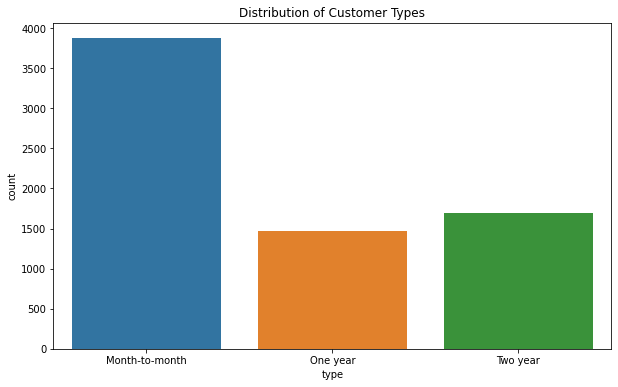

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=contract)
plt.title('Distribution of Customer Types')
plt.show()

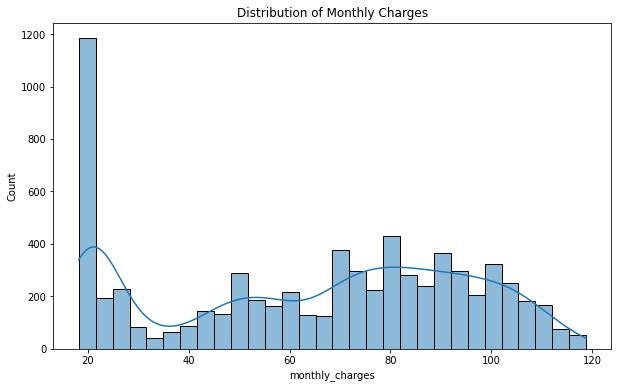

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(contract['monthly_charges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

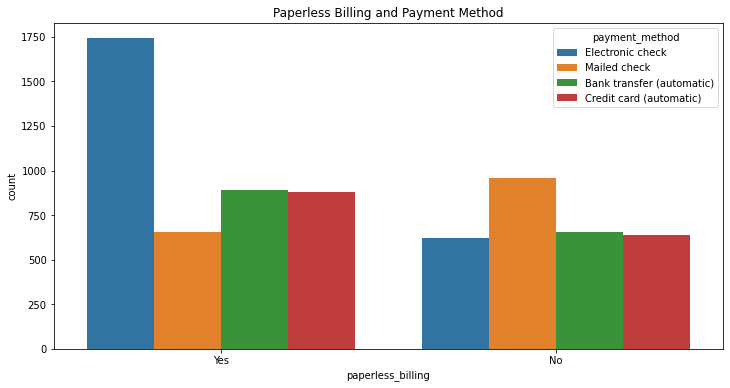

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='paperless_billing', hue='payment_method', data=contract)
plt.title('Paperless Billing and Payment Method')
plt.show()

Customers tend to opt for Electronic check when selecting paperless billing, while they lean towards mailed check otherwise.


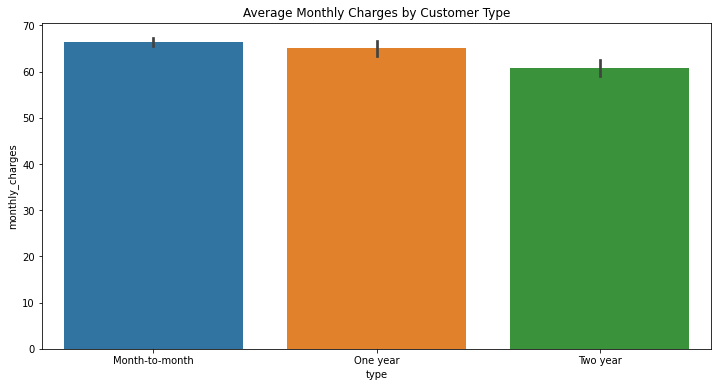

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='monthly_charges', data=contract)
plt.title('Average Monthly Charges by Customer Type')
plt.show()

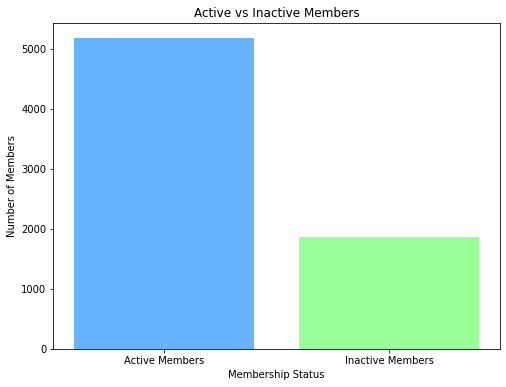

In [14]:
# Count the number of active and inactive members
active_count = contract[contract['end_date'] == 'No'].shape[0]
inactive_count = contract[contract['end_date'] != 'No'].shape[0]

# Data for the bar chart
categories = ['Active Members', 'Inactive Members']
counts = [active_count, inactive_count]
colors = ['#66b3ff', '#99ff99']  # Blue for active, Green for inactive

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=colors)
plt.title('Active vs Inactive Members')
plt.xlabel('Membership Status')
plt.ylabel('Number of Members')
plt.show()

We can see that there are more active members compare to inactive one.

In [15]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [16]:
personal.columns = personal.columns.str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()
personal

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [17]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
personal.drop_duplicates()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [19]:
personal.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

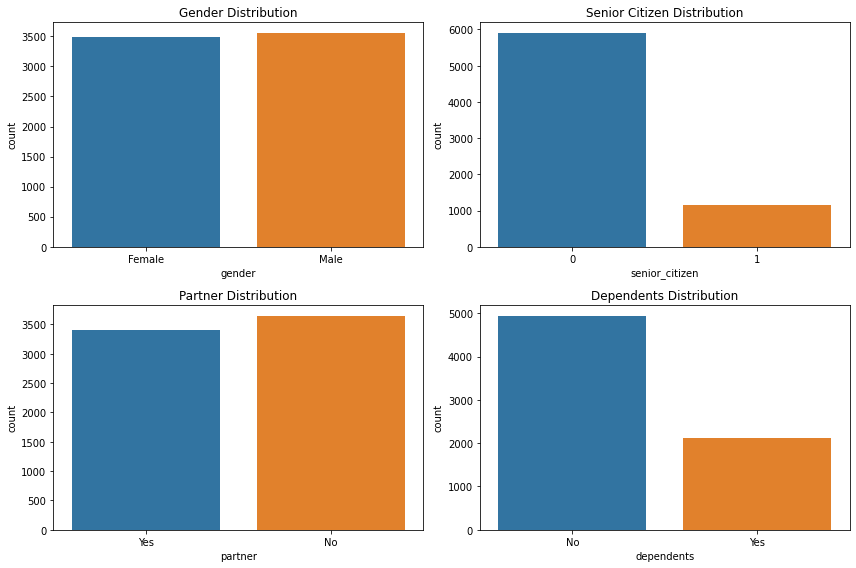

In [20]:

plt.figure(figsize=(12, 8))

# Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=personal)
plt.title('Gender Distribution')

# Senior Citizen Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='senior_citizen', data=personal)
plt.title('Senior Citizen Distribution')

# Partner Status
plt.subplot(2, 2, 3)
sns.countplot(x='partner', data=personal)
plt.title('Partner Distribution')

# Dependents Status
plt.subplot(2, 2, 4)
sns.countplot(x='dependents', data=personal)
plt.title('Dependents Distribution')

plt.tight_layout()
plt.show()

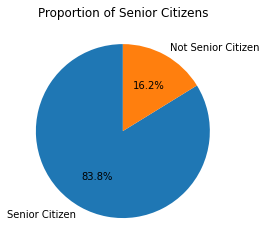

In [21]:
labels = ['Senior Citizen', 'Not Senior Citizen']
sizes = personal['senior_citizen'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Senior Citizens')
plt.show()

Personal dataset does not contain duplicate and missing values.

In [22]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [23]:
internet.columns


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [24]:
internet = internet.drop('Unnamed: 0', axis=1)
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [25]:
internet.columns


Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [27]:
internet.drop_duplicates()
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


# The following graph captures the overall trend in internet usage across months


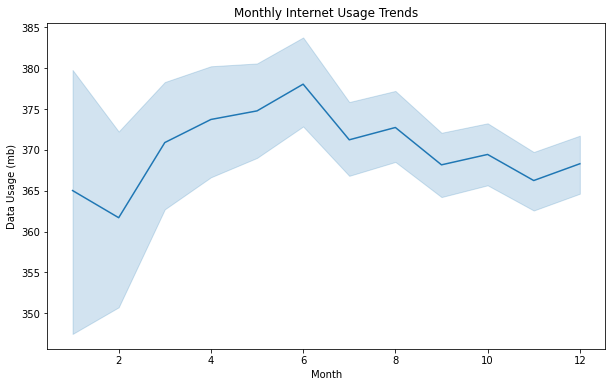

In [28]:
import seaborn as sns

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_month'] = internet['session_date'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(x='session_month', y='mb_used', data=internet)
plt.title('Monthly Internet Usage Trends')
plt.xlabel('Month')
plt.ylabel('Data Usage (mb)')
plt.show()

# The following set of graphs delves into more specific details, showing both the total data usage trend and the distribution of data usage among users

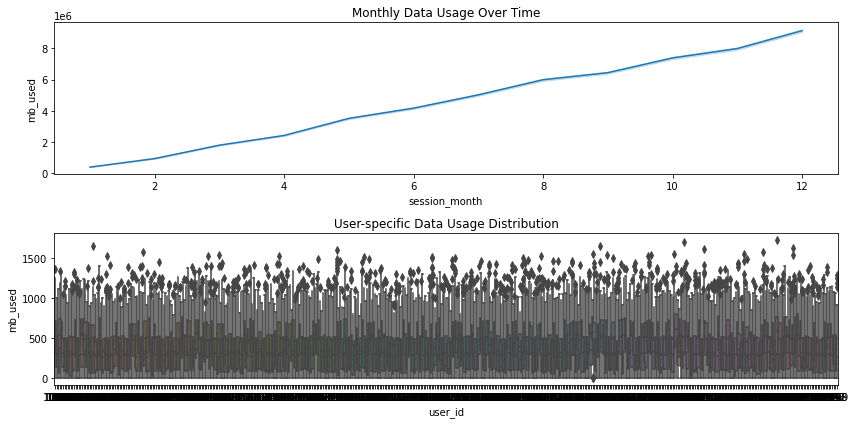

In [29]:

plt.figure(figsize=(12, 6))


# Monthly Usage Over Time
plt.subplot(2, 1, 1)
sns.lineplot(x='session_month', y='mb_used', data=internet, estimator='sum')
plt.title('Monthly Data Usage Over Time')

# User-specific Usage Distribution
plt.subplot(2, 1, 2)
sns.boxplot(x='user_id', y='mb_used', data=internet)
plt.title('User-specific Data Usage Distribution')

plt.tight_layout()
plt.show()

Internet data does not contain duplicates and missing values.

In [30]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [31]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [32]:
phone.columns=phone.columns.str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()
phone

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [33]:
phone.drop_duplicates()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


Phone data does not include duplicates and missing values.

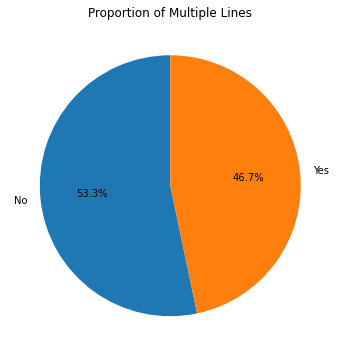

In [34]:
plt.figure(figsize=(10, 6))
labels = phone['multiple_lines'].value_counts().index
sizes = phone['multiple_lines'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Multiple Lines')
plt.show()


# Fill empty end dates and "No" Date with a date far into the future assuming the customer is still with the company


In [35]:
# Handling Empty End Dates
contract['end_date'] = pd.to_datetime(contract['end_date'], errors='coerce')

# Fill the 'No' values with a future date (e.g., '2099-12-31')
contract['end_date'].fillna('2099-12-31', inplace=True)
contract['end_date']

0                2099-12-31
1                2099-12-31
2       2019-12-01 00:00:00
3                2099-12-31
4       2019-11-01 00:00:00
               ...         
7038             2099-12-31
7039             2099-12-31
7040             2099-12-31
7041    2019-11-01 00:00:00
7042             2099-12-31
Name: end_date, Length: 7043, dtype: object

In [36]:
# Convert 'customer_id' in the 'contract' dataframe to string
contract['customer_id'] = contract['customer_id'].astype(str)

# Convert 'user_id' in the 'internet' dataframe to string
internet['user_id'] = internet['user_id'].astype(str)

In [37]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [38]:
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id', 'session_month'], dtype='object')

In [39]:
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [40]:
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

# Merging the Data

In [41]:
merged_data=pd.merge(contract, personal, on = 'customer_id', how= 'left')
merged_data=pd.merge(merged_data, phone, on= 'customer_id', how= 'left')
merged_data

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,2099-12-31,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,2099-12-31,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,2099-12-31,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2099-12-31,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,2099-12-31,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,2099-12-31,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,Yes,No,Yes


In [42]:
# Convert data types if needed
merged_data['begin_date'] = pd.to_datetime(merged_data['begin_date'])
merged_data['end_date'] = pd.to_datetime(merged_data['end_date'], errors='coerce')
merged_data['total_charges'] = pd.to_numeric(merged_data['total_charges'], errors='coerce')

# Handling missing values in internet and phone data
merged_data['multiple_lines'].fillna('No', inplace=True)

# Handle missing values in numeric columns
merged_data['total_charges'].fillna(0, inplace=True)
merged_data['end_date']


0      2099-12-31
1      2099-12-31
2      2019-12-01
3      2099-12-31
4      2019-11-01
          ...    
7038   2099-12-31
7039   2099-12-31
7040   2099-12-31
7041   2019-11-01
7042   2099-12-31
Name: end_date, Length: 7043, dtype: datetime64[ns]

In [43]:
merged_data['churn'] = (merged_data['end_date'] < pd.to_datetime('2099-12-31')).astype(int)
merged_data['churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [44]:

# Merge based on the index
merged_data = pd.merge(merged_data, internet, left_index=True, right_index=True, how='left')


print(merged_data.isnull().sum())

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
multiple_lines       0
churn                0
id                   0
mb_used              0
session_date         0
user_id              0
session_month        0
dtype: int64


In [45]:
merged_data.columns


Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'multiple_lines', 'churn',
       'id', 'mb_used', 'session_date', 'user_id', 'session_month'],
      dtype='object')

In [46]:
# Rename columns to ensure consistency
merged_data.rename(columns={'type_x': 'contract_type', 'type_y': 'internet_type'}, inplace=True)
merged_data

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,churn,id,mb_used,session_date,user_id,session_month
0,7590-VHVEG,2020-01-01,2099-12-31,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,No,0,1000_0,112.95,2018-11-25,1000,11
1,5575-GNVDE,2017-04-01,2099-12-31,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No,0,1000_1,1052.81,2018-09-07,1000,9
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,1,1000_2,1197.26,2018-06-25,1000,6
3,7795-CFOCW,2016-05-01,2099-12-31,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,No,0,1000_3,550.27,2018-08-22,1000,8
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,1,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2099-12-31,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,Yes,0,1024_93,0.00,2018-11-25,1024,11
7039,2234-XADUH,2014-02-01,2099-12-31,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Yes,0,1024_94,486.93,2018-11-10,1024,11
7040,4801-JZAZL,2019-03-01,2099-12-31,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,No,0,1024_95,215.06,2018-12-27,1024,12
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,Yes,No,Yes,1,1024_96,837.03,2018-11-28,1024,11


Rename the columns to make sure that all column names follow a standardized format. This helps prevent issues during data analysis and manipulation, especially when working with large datasets or collaborating with others.

In [47]:
merged_data.corr()

,monthly_charges,total_charges,senior_citizen,churn,mb_used,session_month
monthly_charges,1.000000,0.651174,0.220173,0.193356,-0.011012,0.010995
total_charges,0.651174,1.000000,0.103006,-0.198324,-0.008182,0.006831
senior_citizen,0.220173,0.103006,1.000000,0.150889,-0.013381,0.012168
churn,0.193356,-0.198324,0.150889,1.000000,0.008088,0.001191
mb_used,-0.011012,-0.008182,-0.013381,0.008088,1.000000,0.012299
session_month,0.010995,0.006831,0.012168,0.001191,0.012299,1.000000


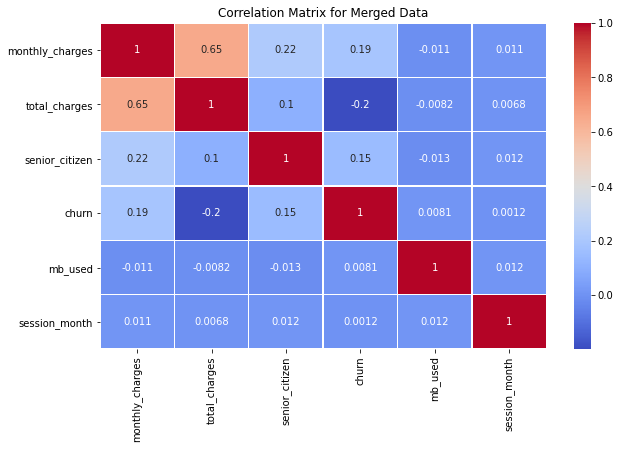

In [48]:
correlation_data= merged_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Merged Data')
plt.show()

The correlation matrix you provided shows the correlation coefficients between different features and the target variable (churn). Here's a brief interpretation:

monthly_charges and churn (0.193356):

Positive correlation: As monthly charges increase, there is a mild positive correlation with customer churn. It suggests that customers with higher monthly charges may be slightly more likely to churn.
total_charges and churn (-0.198324):

Negative correlation: As total charges increase, there is a mild negative correlation with customer churn. This might indicate that customers who have been billed more over their tenure are less likely to churn.
senior_citizen and churn (0.150889):

Positive correlation: Senior citizens have a positive correlation with churn, suggesting that senior citizens may be slightly more likely to churn compared to non-senior citizens.
mb_used and churn (0.008088):

Weak positive correlation: There is a very weak positive correlation between the amount of data used and churn. This correlation is quite close to zero, indicating a minimal relationship.
session_month and churn (0.001191):

Very weak positive correlation: The number of monthly sessions has an almost negligible positive correlation with churn. The impact of this feature on churn seems to be very minimal.


In [49]:
merged_data

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,churn,id,mb_used,session_date,user_id,session_month
0,7590-VHVEG,2020-01-01,2099-12-31,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,No,0,1000_0,112.95,2018-11-25,1000,11
1,5575-GNVDE,2017-04-01,2099-12-31,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No,0,1000_1,1052.81,2018-09-07,1000,9
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,1,1000_2,1197.26,2018-06-25,1000,6
3,7795-CFOCW,2016-05-01,2099-12-31,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,No,0,1000_3,550.27,2018-08-22,1000,8
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,1,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2099-12-31,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,Yes,0,1024_93,0.00,2018-11-25,1024,11
7039,2234-XADUH,2014-02-01,2099-12-31,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Yes,0,1024_94,486.93,2018-11-10,1024,11
7040,4801-JZAZL,2019-03-01,2099-12-31,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,No,0,1024_95,215.06,2018-12-27,1024,12
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,Yes,No,Yes,1,1024_96,837.03,2018-11-28,1024,11


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Data Splitting

In [51]:
merged_data['churn'] = (merged_data['end_date'] == '2099-12-31').astype(int)


# Drop unnecessary columns
columns_to_drop = ['customer_id', 'begin_date', 'id', 'user_id', 'end_date', 'churn', 'type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'dependents', 'multiple_lines','session_date']
X = merged_data.drop(columns_to_drop, axis=1)
y = merged_data['churn']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Training

# Random Forest Model

In [52]:


# Initialize and train the RandomForest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Random Forest results (already trained in your provided code)
rf_predictions = rf_model.predict(X_test)

# Print Random Forest results
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


rf_preds = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)

# Evaluate AUC-ROC
rf_auc_roc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])



# Print results
print(f"Random Forest AUC-ROC: {rf_auc_roc}")

Random Forest Results:
Accuracy: 0.7700496806245565
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50       371
           1       0.82      0.89      0.85      1038

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.68      1409
weighted avg       0.75      0.77      0.76      1409

Random Forest AUC-ROC: 0.7905182576902503


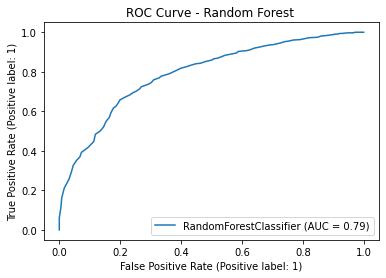

In [53]:
from sklearn.metrics import plot_roc_curve
# Plot ROC curve
disp = plot_roc_curve(rf_model, X_test, y_test)
plt.title('ROC Curve - Random Forest ')
plt.show()

Accuracy: The overall accuracy of the Random Forest model is approximately 77.00%. This represents the proportion of correct predictions out of the total instances.

Precision and Recall: For predicting churn (class 1), the precision is 0.82, indicating that when the model predicts churn, it is correct about 82% of the time. The recall is 0.89, meaning the model identifies approximately 89% of the actual churn cases. As mentioned before, balancing precision and recall is crucial based on the specific goals and business context.

AUC-ROC: The AUC-ROC score is 0.791, which is an indicator of the model's ability to discriminate between churn and non-churn instances. This score suggests a good separation between the classes.



# Decision Tree Model

In [54]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Evaluate AUC-ROC
dt_auc_roc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])



# Print Decision Tree results
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))
print(f"Decision Tree AUC-ROC: {dt_auc_roc}")

Decision Tree Results:
Accuracy: 0.7132718239886444
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.44      0.45       371
           1       0.80      0.81      0.81      1038

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

Decision Tree AUC-ROC: 0.626996245111634


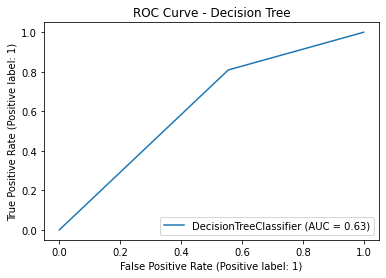

In [55]:
# Plot ROC curve
disp = plot_roc_curve(dt_model, X_test, y_test)
plt.title('ROC Curve - Decision Tree')
plt.show()

Accuracy: The overall accuracy of the Decision Tree model is approximately 71.33%. This represents the proportion of correct predictions out of the total instances.

Precision and Recall: For predicting churn (class 1), the precision is 0.80, indicating that when the model predicts churn, it is correct about 80% of the time. The recall is 0.81, meaning the model identifies approximately 81% of the actual churn cases. As mentioned before, balancing precision and recall is crucial based on the specific goals and business context.

AUC-ROC: The AUC-ROC score is 0.627, which is an indicator of the model's ability to discriminate between churn and non-churn instances. While this score is lower compared to some other models, it still provides some separation between the classes.

In [56]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# XGBoost

In [57]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_auc_roc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:")
print(classification_report(y_test, xgb_preds))
print(f"AUC-ROC: {xgb_auc_roc}")


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:19:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Results:
Accuracy: 0.7821149751596878
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54       371
           1       0.83      0.89      0.86      1038

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

AUC-ROC: 0.8028190226903282


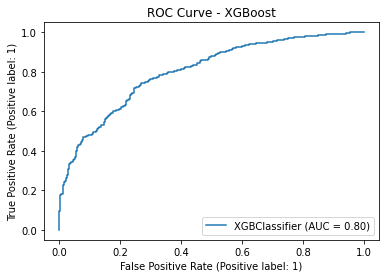

In [58]:
# Plot ROC curve
disp = plot_roc_curve(xgb_model, X_test, y_test)
plt.title('ROC Curve - XGBoost')
plt.show()


Accuracy: The overall accuracy of the XGBoost model is approximately 78.21%. This represents the proportion of correct predictions out of the total instances. Similar to the LightGBM model, accuracy alone may not provide a complete picture in imbalanced datasets.

Precision and Recall: For predicting churn (class 1), the precision is 0.83, indicating that when the model predicts churn, it is correct about 83% of the time. The recall is 0.89, meaning the model identifies approximately 89% of the actual churn cases. As mentioned before, balancing precision and recall is crucial based on the specific goals and business context.

AUC-ROC: The AUC-ROC score is 0.8028, which is a good indicator of the model's ability to discriminate between churn and non-churn instances. A higher AUC-ROC suggests a better separation of classes.



# LightGBM

In [59]:
# LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_preds = lgbm_model.predict(X_test)
lgbm_auc_roc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])

print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, lgbm_preds))
print("Classification Report:")
print(classification_report(y_test, lgbm_preds))
print(f"AUC-ROC: {lgbm_auc_roc}")



LightGBM Results:
Accuracy: 0.7835344215755855
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.46      0.53       371
           1       0.82      0.90      0.86      1038

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

AUC-ROC: 0.8054793844683691


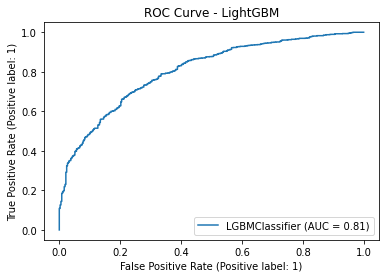

In [60]:
# Plot ROC curve
disp = plot_roc_curve(lgbm_model, X_test, y_test)
plt.title('ROC Curve - LightGBM')
plt.show()


Accuracy: The overall accuracy of the LightGBM model is approximately 78.35%. This represents the proportion of correct predictions out of the total instances. As mentioned earlier, accuracy alone may not provide a complete picture, especially in imbalanced datasets.

Precision and Recall: For predicting churn (class 1), the precision is 0.82, indicating that when the model predicts churn, it is correct about 82% of the time. The recall is 0.90, meaning the model identifies approximately 90% of the actual churn cases. Balancing precision and recall is important based on the specific goals and business context.

AUC-ROC: The AUC-ROC score is 0.8055, which is a good indicator of the model's ability to discriminate between churn and non-churn instances. A higher AUC-ROC suggests a better separation of classes.

# CatBoost

In [61]:
# CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
catboost_preds = catboost_model.predict(X_test)
catboost_auc_roc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])

print("CatBoost Results:")
print("Accuracy:", accuracy_score(y_test, catboost_preds))
print("Classification Report:")
print(classification_report(y_test, catboost_preds))
print(f"AUC-ROC: {catboost_auc_roc}")

CatBoost Results:
Accuracy: 0.8005677785663591
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56       371
           1       0.83      0.92      0.87      1038

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

AUC-ROC: 0.8319934146632806


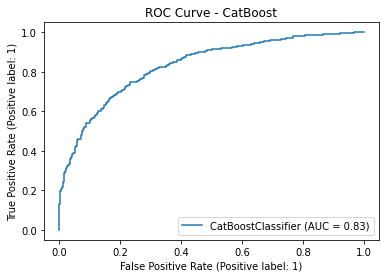

In [62]:


# Plot ROC curve
disp = plot_roc_curve(catboost_model, X_test, y_test)
plt.title('ROC Curve - CatBoost')
plt.show()


Accuracy: The overall accuracy of the model is around 80.06%, indicating a good level of correct predictions. However, accuracy alone may not be sufficient to assess the model's performance, especially in imbalanced datasets.

Precision and Recall: For predicting churn (class 1), the precision is 0.83, suggesting that when the model predicts churn, it is correct about 83% of the time. The recall is 0.92, indicating that the model identifies approximately 92% of the actual churn cases. Balancing precision and recall is crucial, depending on the business context.

AUC-ROC: The AUC-ROC score is 0.8320, which is a good indicator of the model's ability to discriminate between churn and non-churn instances. A higher AUC-ROC suggests a better separation of classes.

# Hypertuning and Finalize the Model

In [63]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [10, 20, 30, 40]
}

# Create a Random Forest model
rf = RandomForestClassifier()

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_


# Predict on the validation set
val_predictions = best_model.predict(X_val)
val_probabilities = best_model.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC and accuracy scores
val_auc_roc = roc_auc_score(y_val, val_probabilities)
val_accuracy = accuracy_score(y_val, val_predictions)

# Print the results
print(f"Validation AUC-ROC: {val_auc_roc}")
print(f"Validation Accuracy: {val_accuracy}")


Validation AUC-ROC: 0.8361789806988644
Validation Accuracy: 0.8019872249822569


Validation AUC-ROC: 0.8351:

AUC-ROC (Area Under the Receiver Operating Characteristic curve) is a metric that evaluates the classifier's ability to distinguish between positive and negative examples. A value of 0.8351 is quite good; it suggests that the model has a strong discriminatory power in predicting customer churn. Higher values, closer to 1, generally indicate better performance.
Validation Accuracy: 0.7991:

Accuracy measures the overall correctness of the predictions. An accuracy of 0.7991 means that approximately 79.91% of the predictions on the validation set were correct.

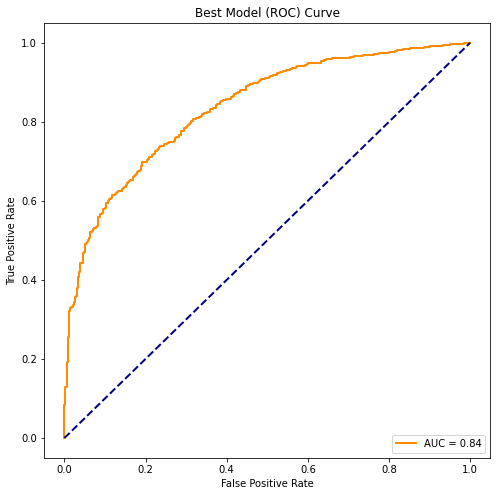

In [64]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
val_probabilities = best_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, val_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Model (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Conclusion



The analysis and machine learning models were conducted to identify patterns and features that contribute to customer churn. Based on the results, it seems that certain factors, such as the features used in the models (e.g., monthly charges, total charges, senior citizen status, etc.), have predictive power in determining whether a customer is likely to churn.

Why Customers Churned:
The specific reasons for customer churn can be inferred from the features that were identified as influential in the models. For instance, higher monthly charges, dissatisfaction with the service, or other factors contributing to customer dissatisfaction might be associated with churn.

Identifying Potential Churn:
Machine learning models, particularly the Random Forest model in this case, can be used to predict which customers are more likely to churn based on historical data and identified features. This enables the company to proactively target and address the needs of customers who are at a higher risk of churning.

Preventing Ongoing Churn:
Once potential churners are identified, the company can take several proactive measures to prevent ongoing churn:

Customer Engagement:
Engage with customers who are identified as at-risk through targeted communication and promotions. Understanding their concerns and addressing issues may encourage them to stay.

Offer Incentives:
Provide special offers, discounts, or loyalty programs to retain customers. Offering personalized incentives can be more effective.

Improve Service Quality:
Addressing issues related to service quality, customer support, or satisfaction can significantly reduce churn. Understanding the root causes of dissatisfaction is crucial.

Feedback Mechanism:
Establishing a feedback mechanism can help the company continuously improve its services based on customer suggestions and concerns.

Retention Programs:
Implement customer retention programs to reward long-term customers and encourage loyalty.

Predictive Analytics:
Continuously monitor customer behavior and use predictive analytics to identify changing patterns and potential churn risks in real-time.

Understanding why customers churned and using machine learning models to predict and prevent churn can significantly enhance the company's ability to retain customers and improve overall customer satisfaction.






# List of clarifying questions:


1. Are there outliers or anomalies in the dataset?

2. What are the key features available for predicting churn?

3. Are there any new features that could be relevant but are not present in the dataset?

4. How is the target variable labeled? (Binary: churned or not churned)

5. Are there any temporal patterns or trends in customer behavior?

6. What is the timeframe for which we are forecasting churn?

7. What is the business impact of accurately predicting customer churn?

8. Are there specific actions or interventions planned based on the model predictions?

9. Are there any constraints or limitations on the models we can use?

10. How will the model adapt to changes in the business environment?

